In [0]:
# DATA SOURCE
# The dataset is open data from Kaggle (https://www.kaggle.com/juzershakir/tmdb-movies-dataset). 
#The data is collected from TMDb, a trustworthy and an authoritative source of information on films.
#Analysis - Budget vs Revenue

In [0]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext.setConf("spark.sql.parquet.useDataSourceApi", "false")

In [0]:
dataPath = "dbfs:/FileStore/shared_uploads/chitranee.ambagaspitiye@sait.ca/tmdb_movies_data.csv"
file_type = "csv"

#csv options

infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type).option("inferSchema", infer_schema).option("header",first_row_is_header)\
.option("sep",delimiter).option("nanValue",'').option("nullValue",' ').load(dataPath)

display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj 135397 tt0369610 32.985763 150000000 1513528810 Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson http://www.jurassicworld.com/ Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 137999939.3 1392445893 76341 tt1392190 28.419936 150000000 378436354 Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman http://www.madmaxmovie.com/ George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 137999939.3 348161292.5 262500 tt2908446 13.112507 110000000 295238201 Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller http://www.thedivergentseries.movie/#insurgent Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 101199955.5 271619025.4 140607 tt2488496 11.173104 200000000 2068178225 Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley http://www.starwars.com/films/star-wars-episode-vii J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 183999919 1902723130 168259 tt2820852 9.335014 190000000 1506249360 Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson http://www.furious7.com/ James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 174799923.1 1385748801 281957 tt1663202 9.1107 135000000 532950503 The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson http://www.foxmovies.com/movies/the-revenant Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 124199945.4 490314247 87101 tt134013

In [0]:
df.printSchema()

root
-- id: string (nullable = true)
-- imdb_id: string (nullable = true)
-- popularity: string (nullable = true)
-- budget: string (nullable = true)
-- revenue: string (nullable = true)
-- original_title: string (nullable = true)
-- cast: string (nullable = true)
-- homepage: string (nullable = true)
-- director: string (nullable = true)
-- tagline: string (nullable = true)
-- keywords: string (nullable = true)
-- overview: string (nullable = true)
-- runtime: string (nullable = true)
-- genres: string (nullable = true)
-- production_companies: string (nullable = true)
-- release_date: string (nullable = true)
-- vote_count: string (nullable = true)
-- vote_average: string (nullable = true)
-- release_year: string (nullable = true)
-- budget_adj: string (nullable = true)
-- revenue_adj: string (nullable = true)

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.functions import when, lit, col
import pyspark.sql.functions as func
 
df = df.withColumn("id", df["id"].cast(IntegerType()))
df = df.withColumn("imdb_id", df["imdb_id"].cast(StringType()))
df = df.withColumn("popularity",(df["popularity"]).cast(DoubleType()))
df = df.withColumn("budget", df["budget"].cast(DoubleType()))
df = df.withColumn("revenue", df["revenue"].cast(DoubleType()))
df = df.withColumn("original_title", df["original_title"].cast(StringType()))
df = df.withColumn("cast", df["cast"].cast(StringType()))
df = df.withColumn("homepage", when(df["homepage"].cast(StringType())!= "null" ,"Yes").otherwise("No"))
df = df.withColumn("director", df["director"].cast(StringType()))
df = df.withColumn("tagline", df["tagline"].cast(StringType()))
df = df.withColumn("keywords", df["keywords"].cast(StringType()))
df = df.withColumn("overview", df["overview"].cast(StringType()))
df = df.withColumn("runtime", df["runtime"].cast(IntegerType()))
df = df.withColumn("genres", df["genres"].cast(StringType()))
df = df.withColumn("production_companies", df["production_companies"].cast(StringType()))
df = df.withColumn("release_date", df["release_date"].cast(StringType()))
df = df.withColumn("vote_count", df["vote_count"].cast(IntegerType()))
df = df.withColumn("vote_average", df["vote_average"].cast(DoubleType()))
df = df.withColumn("release_year", df["release_year"].cast(IntegerType()))
df = df.withColumn("budget_adj", df["budget_adj"].cast(DoubleType()))
df = df.withColumn("revenue_adj", df["revenue_adj"].cast(DoubleType()))
#revenue_adj turn to new column as int
df=df.withColumn("adjrevint",func.round(df["revenue_adj"],2).cast(IntegerType()))
#new column as integer vote_average avgvote
df = df.withColumn("avgvote",func.round(df["vote_average"],2).cast(IntegerType()))


In [0]:
display(df)

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj adjrevint avgvote 135397 tt0369610 32.985763 1.5E8 1.51352881E9 Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson Yes Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 1.379999393E8 1.392445893E9 1392445893 6 76341 tt1392190 28.419936 1.5E8 3.78436354E8 Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman Yes George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 1.379999393E8 3.481612925E8 348161292 7 262500 tt2908446 13.112507 1.1E8 2.95238201E8 Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller Yes Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 1.011999555E8 2.716190254E8 271619025 6 140607 tt2488496 11.173104 2.0E8 2.068178225E9 Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley Yes J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 1.83999919E8 1.90272313E9 1902723130 7 168259 tt2820852 9.335014 1.9E8 1.50624936E9 Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson Yes James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 1.747999231E8 1.385748801E9 1385748801 7 281957 tt1663202 9.1107 1.35E8 5.32950503E8 The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson Yes Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 1.241999454E8 4.90314247E8 490314247 7 87101 tt1340138 8.654359 1.55E8 4.40603537E8 Terminator Genisys Arnold Schwarzenegger|Jason Clarke|Emil

In [0]:
#count number of records
#df.count()
print("number of records: ", df.count())


number of records: 10879

In [0]:
df.printSchema()

root
-- id: integer (nullable = true)
-- imdb_id: string (nullable = true)
-- popularity: double (nullable = true)
-- budget: double (nullable = true)
-- revenue: double (nullable = true)
-- original_title: string (nullable = true)
-- cast: string (nullable = true)
-- homepage: string (nullable = false)
-- director: string (nullable = true)
-- tagline: string (nullable = true)
-- keywords: string (nullable = true)
-- overview: string (nullable = true)
-- runtime: integer (nullable = true)
-- genres: string (nullable = true)
-- production_companies: string (nullable = true)
-- release_date: string (nullable = true)
-- vote_count: integer (nullable = true)
-- vote_average: double (nullable = true)
-- release_year: integer (nullable = true)
-- budget_adj: double (nullable = true)
-- revenue_adj: double (nullable = true)
-- adjrevint: integer (nullable = true)
-- avgvote: integer (nullable = true)

In [0]:
#assign to pandas dataframe view table how many records etc. there are 10866 record
import pandas as pd
pd_df=df.toPandas()
pd_df.describe()

id 
 popularity 
 budget 
 revenue 
 runtime 
 vote_count 
 vote_average 
 release_year 
 budget_adj 
 revenue_adj 
 adjrevint 
 avgvote 
 
 
 
 
 count 
 10866.000000 
 10868.000000 
 1.086800e+04 
 1.086900e+04 
 10142.000000 
 10216.000000 
 10411.000000 
 10571.000000 
 1.067300e+04 
 1.073900e+04 
 1.073900e+04 
 10411.000000 
 
 
 mean 
 66064.177434 
 0.666013 
 1.462301e+07 
 3.981233e+07 
 102.033228 
 217.126175 
 13.121083 
 1923.206225 
 1.674564e+07 
 4.940966e+07 
 4.925130e+07 
 12.685909 
 
 
 std 
 92130.136561 
 1.756740 
 3.091101e+07 
 1.169892e+08 
 31.276450 
 568.505048 
 148.447685 
 385.015277 
 3.382852e+07 
 1.429689e+08 
 1.402927e+08 
 148.468942 
 
 
 min 
 5.000000 
 0.000065 
 0.000000e+00 
 0.000000e+00 
 0.000000 
 10.000000 
 1.500000 
 0.000000 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 1.000000 
 
 
 25% 
 10596.250000 
 0.207598 
 0.000000e+00 
 0.000000e+00 
 90.000000 
 17.000000 
 5.400000 
 1993.000000 
 0.000000e+00 
 0.000000e+00 
 0.000000e+00 
 5.000000 
 
 
 50% 
 20669.000000 
 0.383900 
 0.000000e+00 
 0.000000e+00 
 99.000000 
 39.000000 
 6.100000 
 2005.000000 
 5.400000e+00 
 0.000000e+00 
 0.000000e+00 
 6.000000 
 
 
 75% 
 75610.000000 
 0.714156 
 1.500000e+07 
 2.400000e+07 
 111.000000 
 146.000000 
 6.700000 
 2011.000000 
 1.934291e+07 
 3.042052e+07 
 3.042052e+07 
 6.000000 
 
 
 max 
 417859.000000 
 112.000000 
 4.250000e+08 
 2.781506e+09 
 900.000000 
 8903.000000 
 9767.000000 
 3533.000000 
 4.250000e+08 
 2.827124e+09 
 2.147484e+09 
 9767.000000

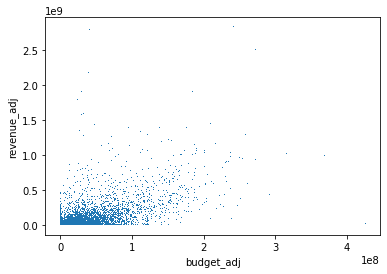

In [0]:
#view budget and revenue behaviour
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pd_df['budget_adj'], pd_df['revenue_adj'],',')
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj')
display()

In [0]:
#count null looks like every column has null
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+
 id|imdb_id|popularity|budget|revenue|original_title|cast|homepage|director|tagline|keywords|overview|runtime|genres|production_companies|release_date|vote_count|vote_average|release_year|budget_adj|revenue_adj|adjrevint|avgvote|
+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+
 13| 10| 11| 11| 10| 4| 80| 0| 47| 2827| 1498| 11| 737| 45| 956| 42| 663| 468| 308| 206| 140| 140| 468|
+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+

In [0]:
#drop some rows with null value 

df = df.dropna(subset=["id","budget","revenue","runtime","budget_adj","revenue_adj"])
                       

In [0]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+
 id|imdb_id|popularity|budget|revenue|original_title|cast|homepage|director|tagline|keywords|overview|runtime|genres|production_companies|release_date|vote_count|vote_average|release_year|budget_adj|revenue_adj|adjrevint|avgvote|
+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+
 0| 9| 0| 0| 0| 0| 69| 0| 41| 2630| 1402| 4| 0| 23| 934| 0| 0| 0| 0| 0| 0| 0| 0|
+---+-------+----------+------+-------+--------------+----+--------+--------+-------+--------+--------+-------+------+--------------------+------------+----------+------------+------------+----------+-----------+---------+-------+

In [0]:
#create a veiw or table
temp_table_name = "movie_analysis"
df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql
select * from movie_analysis

id imdb_id popularity budget revenue original_title cast homepage director tagline keywords overview runtime genres production_companies release_date vote_count vote_average release_year budget_adj revenue_adj adjrevint avgvote 135397 tt0369610 32.985763 1.5E8 1.51352881E9 Jurassic World Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson Yes Colin Trevorrow The park is open. monster|dna|tyrannosaurus rex|velociraptor|island Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond. 124 Action|Adventure|Science Fiction|Thriller Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu 6/9/2015 5562 6.5 2015 1.379999393E8 1.392445893E9 1392445893 6 76341 tt1392190 28.419936 1.5E8 3.78436354E8 Mad Max: Fury Road Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman Yes George Miller What a Lovely Day. future|chase|post-apocalyptic|dystopia|australia An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland. 120 Action|Adventure|Science Fiction|Thriller Village Roadshow Pictures|Kennedy Miller Productions 5/13/2015 6185 7.1 2015 1.379999393E8 3.481612925E8 348161292 7 262500 tt2908446 13.112507 1.1E8 2.95238201E8 Insurgent Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller Yes Robert Schwentke One Choice Can Destroy You based on novel|revolution|dystopia|sequel|dystopic future Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart. 119 Adventure|Science Fiction|Thriller Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel 3/18/2015 2480 6.3 2015 1.011999555E8 2.716190254E8 271619025 6 140607 tt2488496 11.173104 2.0E8 2.068178225E9 Star Wars: The Force Awakens Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley Yes J.J. Abrams Every generation has a story. android|spaceship|jedi|space opera|3d Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers. 136 Action|Adventure|Science Fiction|Fantasy Lucasfilm|Truenorth Productions|Bad Robot 12/15/2015 5292 7.5 2015 1.83999919E8 1.90272313E9 1902723130 7 168259 tt2820852 9.335014 1.9E8 1.50624936E9 Furious 7 Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson Yes James Wan Vengeance Hits Home car race|speed|revenge|suspense|car Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother. 137 Action|Crime|Thriller Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films 4/1/2015 2947 7.3 2015 1.747999231E8 1.385748801E9 1385748801 7 281957 tt1663202 9.1107 1.35E8 5.32950503E8 The Revenant Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhnall Gleeson|Paul Anderson Yes Alejandro GonzÃ¡lez IÃ±Ã¡rritu (n. One who has returned, as if from the dead.) father-son relationship|rape|based on novel|mountains|winter In the 1820s, a frontiersman, Hugh Glass, sets out on a path of vengeance against those who left him for dead after a bear mauling. 156 Western|Drama|Adventure|Thriller Regency Enterprises|Appian Way|CatchPlay|Anonymous Content|New Regency Pictures 12/25/2015 3929 7.2 2015 1.241999454E8 4.90314247E8 490314247 7 87101 tt1340138 8.654359 1.55E8 4.40603537E8 Terminator Genisys Arnold Schwarzenegger|Jason Clarke|Emil

In [0]:
df.select("vote_count","budget_adj","revenue_adj","adjrevint","avgvote").describe().show()

+-------+------------------+--------------------+-------------------+-------------------+------------------+
summary| vote_count| budget_adj| revenue_adj| adjrevint| avgvote|
+-------+------------------+--------------------+-------------------+-------------------+------------------+
 count| 10139| 10139| 10139| 10139| 10139|
 mean|217.98826314232173| 1.762754555120525E7|5.186326891141042E7|5.169553697356741E7| 5.522339481211165|
 stddev| 570.5691576848976|3.4483318914066374E7|1.466558082328325E8|1.438952115711133E8|0.9782448172217192|
 min| 10| 0.0| 0.0| 0| 1|
 max| 8903| 4.25E8| 2.82712375E9| 2147483647| 9|
+-------+------------------+--------------------+-------------------+-------------------+------------------+

In [0]:
%sql
select original_title,homepage,count(*)from movie_analysis group by original_title,homepage

original_title homepage count(1) Paper Towns No 1 Strange Magic Yes 1 Dead Rising No 1 The Driftless Area Yes 1 Bravetown No 1 The Condemned 2 No 1 World of Tomorrow Yes 1 Ride Along No 1 The Normal Heart No 1 Jarhead 2: Field of Fire No 1 Animal Yes 1 CÃ¡sese quien pueda Yes 1 A Bridge Too Far No 1 The Lovely Bones Yes 1 The Lodger No 1 Stone Yes 1 Fair Game Yes 1 Everything Must Go Yes 1 BloodRayne: The Third Reich No 1 Brotherhood Yes 1 Drop Dead Gorgeous No 1 Saving Silverman No 1 Winning London No 1 Holiday in the Sun No 1 Manic Yes 1 Traitor Yes 1 Soul Men No 1 Good Dick Yes 1 Take Me Home Yes 1 DC Showcase: Catwoman No 1 Natural Born Killers No 1 Prometheus Yes 1 The Dictator Yes 1 The House I Live In No 1 Looney Tunes: Back in Action No 1 Booty Call No 1 Escape Plan Yes 1 The Host No 1 The Look of Love No 1 Castello Cavalcanti Yes 1 Narco Cultura Yes 1 The Jinx: The Life and Deaths of Robert Durst No 1 The Little Death No 1 Time Out of Mind No 1 Sherlock Holmes Yes 1 Mammoth No 1 Scott Pilgrim vs. the World Yes 1 Legion Yes 1 Legend of the BoneKnapper Dragon No 1 Fantasia 2000 No 1 Max Keeble's Big Move No 1 Pour elle No 1 Mum & Dad No 1 The Jungle Book No 2 Moonrise Kingdom Yes 1 Extracted No 1 Final Destination 2 No 1 Cheaper by the Dozen No 1 Coffee and Cigarettes Yes 1 Liar Liar No 1 Wishmaster No 1 Mud No 1 Mischief Night Yes 1 The Appearing No 1 Ass Backwards No 1 Pride & Prejudice Yes 1 Neverwas No 1 Death Tunnel No 1 Slither No 1 Dragonheart 3: The Sorcerer's Curse No 1 Riot No 1 Martyrs No 1 Belli di papÃ  No 1 And Then There Were None Yes 1 How to Train Your Dragon 2 Yes 1 Mythica: A Quest for Heroes Yes 1 Top Five Yes 1 Pas son genre No 1 Squatters Yes 1 The Boondock Saints II: All Saints Day Yes 1 Black Dynamite Yes 1 Blood Creek No 1 Submarino Yes 1 Hunt to Kill No 1 The Rig Yes 1 Brokedown Palace No 1 Nick and Norah's Infinite Playlist No 1 Sunshine Cleaning Yes 1 Two Lovers No 1 Dorothy Mills No 1 The Green Hornet Yes 1 The Guard Yes 1 Snow Flower and the Secret Fan Yes 1 Page One: Inside the New York Times Yes 1 Pearl Jam: Twenty Yes 1 The Client No 1 Burning Bright No 1 The Summit Yes 1 Something's Gotta Give No 1 Intermission No 1 Bright Young Things No 1 Mythica: The Necromancer Yes 1 Crimson Peak Yes 1 Jurassic City No 1 Hitchcock/Truffaut No 1 '71 No 1 No Good Deed Yes 1 Lemon Tree Passage No 1 See No Evil 2 No 1 Minions: Orientation Day No 1 Horton Hears a Who! No 1 The Meerkats Yes 1 Sleep Dealer Yes 1 La luna No 1 The Amityville Haunting No 1 People I Know No 1 Star Trek: Generations No 1 Snow White and the Huntsman Yes 1 MouseHunt No 1 Tarzan No 1 Paranormal Activity: The Marked Ones No 1 Fantastic Four No 1 Prime No 1 Hostel Yes 1 Kiss Kiss Bang Bang No 1 Kinky Boots No 1 The Comedians of Comedy No 1 Flags of Our Fathers No 1 Sinister 2 Yes 1 The Boy Next Door Yes 1 Howl No 1 Some Kind Of Hate No 1 Lost in the Sun No 1 Dracula Untold No 1 A Million Ways to Die in the West No 1 American Heist No 1 The Anomaly Yes 1 Ribbit No 1 Rich Hill No 1 The Blind Side Yes 1 Thick as Thieves No 1 Halloween II Yes 2 The Cove Yes 1 Deep in the Valley No 1 Stolen Lives Yes 1 Alma Yes 1 The Bunny Game No 1 Deuce Bigalow: Male Gigolo No 1 Waking Life No 1 Bully No 1 Signs No 2 The Black Hole No 3 Foo Fighters: Live at Wembley Stadium No 1 Harry Potter and the Chamber of Secrets No 1 Brown Sugar No 1 Disclosure No 1 Mansome Yes 1 Hungry For Change Yes 1 Once Upon a Time in Mexico No 1 Words and Pictures No 1 Louder Than Words No 1 Embrace of the Vampire No 2 Aliens of the Deep No 1 Feed No 1 The Martian Yes 1 Air Yes 1 The Challenger No 1 Almost Home No 1 Asthma No 1 All Relative No 1 Harry Brown No 1 Doctor Who: The Waters of Mars No 1 The Runaways No 1 Vampires Suck Yes 1 The Perfect Host Yes 1 My Sassy Girl No 1 Babysitter Wanted Yes 1 Alyce Kills Yes 1 Home Alone 4 No 1 Lost in La Mancha No 1 The Stand No 1 Grupo 7 No 1 Atlas Shrugged Part II Yes 1 Lemale et ha'halal No 1 Love Never Dies Yes 1 The Last Samura

In [0]:
%sql
select runtime,homepage,count(*)from movie_analysis group by runtime,homepage

runtime homepage count(1) 76 No 24 86 Yes 55 115 Yes 35 143 No 17 252 No 1 134 No 32 110 No 137 27 No 3 99 No 165 135 No 29 389 No 1 134 Yes 14 60 No 18 176 Yes 2 15 Yes 3 400 Yes 1 124 Yes 30 71 Yes 6 164 No 5 129 Yes 15 14 Yes 3 3 Yes 2 91 Yes 67 178 No 4 137 No 22 105 No 183 97 No 219 73 Yes 4 157 Yes 5 112 No 98 88 No 188 400 No 1 172 Yes 2 99 Yes 58 47 No 2 8 No 5 110 Yes 47 57 Yes 4 60 Yes 3 153 No 4 157 No 7 158 Yes 2 95 No 249 154 No 10 94 Yes 62 74 No 26 90 No 361 14 No 2 96 No 213 98 Yes 71 91 No 214 125 Yes 17 100 No 223 85 Yes 58 41 No 3 182 No 4 194 Yes 1 131 No 28 162 Yes 2 133 No 20 171 No 5 122 Yes 21 360 No 2 93 No 232 226 No 1 191 Yes 1 66 Yes 2 139 Yes 7 9 Yes 1 121 Yes 25 31 Yes 1 21 No 2 175 No 4 2 No 3 114 Yes 28 62 No 3 126 No 33 72 Yes 4 233 No 1 75 Yes 21 11 No 3 69 No 4 10 No 4 120 Yes 43 168 Yes 1 18 No 3 70 Yes 4 141 Yes 6 173 Yes 1 43 Yes 1 132 Yes 6 62 Yes 4 705 Yes 1 13 No 3 36 No 2 124 No 50 90 Yes 148 70 No 12 6 No 15 146 Yes 4 160 Yes 3 106 No 146 78 Yes 7 180 No 14 12 Yes 1 84 Yes 35 5 No 9 147 Yes 2 101 No 152 93 Yes 73 21 Yes 1 247 Yes 1 254 No 1 116 Yes 21 43 No 3 76 Yes 12 164 Yes 1 95 Yes 88 103 No 149 7 Yes 8 162 No 4 137 Yes 3 16 No 4 159 Yes 1 150 Yes 4 80 No 53 199 Yes 1 120 No 88 125 No 60 146 No 6 38 No 1 42 Yes 1 178 Yes 1 111 No 98 169 Yes 3 66 No 3 57 No 2 19 No 1 123 No 46 30 No 6 180 Yes 1 44 Yes 1 82 No 55 54 No 2 23 No 2 114 No 92 123 Yes 23 89 Yes 62 540 Yes 1 210 No 1 30 Yes 4 45 Yes 1 2 Yes 2 65 Yes 3 155 Yes 3 143 Yes 4 58 Yes 4 470 No 1 338 No 1 188 Yes 1 56 Yes 2 138 Yes 8 25 No 8 105 Yes 53 152 Yes 6 74 Yes 6 118 Yes 34 185 Yes 2 111 Yes 35 94 No 213 163 Yes 2 64 Yes 1 22 Yes 3 877 No 1 12 No 4 44 No 6 108 No 145 421 No 1 366 No 1 155 No 10 86 No 131 61 No 4 63 No 4 149 No 6 176 No 4 121 No 63 77 No 28 139 No 24 166 Yes 1 250 No 1 75 No 32 49 Yes 1 16 Yes 1 56 No 2 165 No 4 148 Yes 3 191 No 3 77 Yes 7 145 Yes 8 173 No 5 224 No 1 130 Yes 21 6 Yes 7 179 No 2 183 No 2 92 No 183 117 No 71 8 Yes 4 900 Yes 1 102 Yes 64 189 Yes 1 84 No 96 150 No 15 83 No 76 89 No 176 87 Yes 57 80 Yes 25 81 No 61 188 No 1 145 No 7 122 No 51 144 Yes 7 181 No 4 117 Yes 28 26 Yes 1 129 No 35 246 No 1 127 Yes 18 73 No 10 10 Yes 2 20 No 1 42 No 1 24 No 1 48 No 3 55 Yes 1 119 Yes 32 131 Yes 16 119 No 64 3 No 9 58 No 1 47 Yes 2 128 No 44 182 Yes 2 5 Yes 6 130 No 37 40 Yes 1 0 No 23 126 Yes 14 48 Yes 3 52 No 5 25 Yes 2 23 Yes 2 202 No 3 88 Yes 59 67 No 3 240 No 4 208 No 4 201 Yes 1 11 Yes 3 0 Yes 5 136 Yes 12 22 No 8 59 No 1 156 Yes 2 112 Yes 44 97 Yes 67 32 No 1 108 Yes 49 4 No 15 113 No 95 81 Yes 23 168 No 5 184 No 5 165 Yes 2 85 No 159 50 Yes 1 72 No 18 336 Yes 1 96 Yes 63 55 No 2 116 No 88 220 Yes 1 87 No 141 300 No 2 15 No 4 142 Yes 5 7 No 7 135 Yes 7 38 Yes 1 115 No 78 147 No 4 561 No 1 102 No 148 127 No 38 132 No 36 69 Yes 1 282 No 1 63 Yes 1 26 No 5 500 Yes 1 109 Yes 42 68 No 5 186 Yes 1 140 Yes 9 179 Yes 1 118 No 80 82 Yes 22 144 No 13 352 No 1 104 Yes 47 78 No 35 109 No 91 501 Yes 1 149 Yes 4 104 No 136 79 No 33 142 No 9 154 Yes 2 141 No 16 4 Yes 2 45 No 2 136 No 19 98 No 187 213 Yes 1 167 No 4 107 No 135 67 Yes 1 174 No 6 167 Yes 3 148 No 7 161 No 3 49 No 1 71 No 12 248 No 2 17 Yes 1 151 Yes 2 235 No 1 83 Yes 28 183 Yes 3 79 Yes 13 152 No 4 166 No 1 65 No 5 128 Yes 15 106 Yes 55 107 Yes 45 68 Yes 3 64 No 4 9 No 6 187 No 3 100 Yes 92 92 Yes 65 170 No 5 273 No 1 133 Yes 16 138 No 24 566 No 1 153 Yes 4 161 Yes 3 185 No 2 113 Yes 38 140 No 21 101 Yes 64 18 Yes 1 103 Yes 42 240 Yes 1 223 Yes 1 177 No 5 156 No 2 195 Yes 1 372 No 1 186 No 2 192 No 2 225 No 2 242 No 1 219 No 1 193 No 1 216 No 1 292 Yes 1 199 No 1 151 No 5 197 No 3 294 No 1 230 No 1 189 No 2 163 No 3 159 No 2 169 No 2 160 No 3 32 Yes 1 270 No 1 50 No 1 175 Yes 1 236 No 1 200 No 1 158 No 5 195 No 2 51 No 1 28 No 2 13 Yes 1 172 No 1 417 No 1 229 No 1 181 Yes 1

In [0]:
%sql
select adjrevint,homepage,count(*)from movie_analysis group by adjrevint,homepage limit 100

adjrevint homepage count(1) 28081355 Yes 1 26381683 Yes 1 8930475 Yes 1 99360001 No 1 3430162 Yes 1 1291462 Yes 1 144426136 No 1 45054530 No 1 30910260 No 1 541420466 No 1 148068138 No 1 18508096 No 1 194912119 No 1 497843379 Yes 1 5382567 Yes 1 53190 Yes 1 17229885 No 1 41725424 No 1 39681802 Yes 1 97284640 Yes 1 65507271 No 1 18341733 No 1 3005133 No 1 118451761 Yes 1 102963668 No 1 60813386 No 1 177236356 Yes 1 45322311 No 1 487327232 Yes 1 698565012 Yes 1 125840630 No 1 52109 No 1 17445880 Yes 1 108018533 No 1 28854709 No 1 110662825 Yes 1 149992103 Yes 1 42633979 No 1 97242 Yes 1 880596 No 1 31440883 No 1 417838832 Yes 1 369113178 No 1 4376095 Yes 1 11637254 No 1 11031612 Yes 1 265963102 Yes 1 48287768 Yes 1 102386811 Yes 1 105197635 Yes 1 65058885 Yes 1 734099 No 1 674722 No 1 170603779 No 1 172788077 No 1 25011189 No 1 405355075 Yes 1 93903685 Yes 1 2180370 No 1 4882577 Yes 1 29959 Yes 1 138284486 No 1 6402415 No 1 239908 Yes 1 8631 No 1 224146025 Yes 1 93043293 Yes 1 4151783 No 1 19340529 No 1 406257724 Yes 1 42643493 Yes 1 11241931 Yes 1 27 No 1 5145329 No 1 130855702 Yes 1 38037670 No 1 10803646 Yes 1 24401054 No 1 3218666 Yes 1 41609718 No 1 6659357 No 1 279558422 Yes 1 1570679 No 1 515628400 No 1 231185521 Yes 1 20566197 No 1 46150034 Yes 1 57851497 No 1 74040166 No 1 949276533 Yes 1 224920315 Yes 1 90029656 Yes 1 6661755 No 1 51809322 No 1 158268 Yes 1 33465773 Yes 1 606976636 Yes 1 77926965 No 1 20111107 No 1 3707306 Yes 1

In [0]:
%sql
select popularity,homepage,count(*)from movie_analysis group by popularity,homepage

popularity homepage count(1) 5.462138 Yes 1 2.550747 Yes 1 0.91704 Yes 1 0.906036 No 1 0.298751 No 1 0.270408 No 1 0.979655 No 1 0.73558 Yes 1 0.161001 Yes 1 0.117257 No 1 0.20036 No 1 0.383827 No 1 0.348842 No 1 0.740867 Yes 1 0.104635 Yes 1 0.049803 No 1 2.061559 No 1 0.95811 No 1 0.201483 Yes 1 1.052549 No 1 0.72233 No 1 0.362612 No 1 0.063246 No 1 2.571099 Yes 1 1.113113 Yes 1 0.657376 Yes 1 0.288849 No 1 0.198046 No 1 0.258583 No 1 0.044625 No 1 0.072669 Yes 1 1.464718 No 1 0.201372 No 1 0.048863 No 1 0.151929 No 1 0.830597 Yes 1 0.561315 No 1 0.452402 No 1 3.791881 Yes 1 0.555793 No 1 0.239869 No 1 0.651972 No 1 2.95274 Yes 1 0.598246 No 1 0.028666 Yes 1 0.104134 No 1 0.017036 Yes 1 0.787327 No 1 0.468802 No 1 0.353898 No 1 5.603587 Yes 1 0.903283 Yes 1 0.604625 Yes 1 0.315868 Yes 1 0.346557 No 1 0.244507 No 1 0.210766 No 1 0.82677 Yes 1 0.463596 No 1 0.426203 No 1 0.356717 Yes 1 3.941265 Yes 1 5.8984 Yes 1 1.532997 No 1 0.424813 No 1 0.096624 No 1 1.545055 Yes 1 0.704138 Yes 1 0.221957 Yes 1 0.717595 No 1 2.719461 Yes 1 0.122365 No 1 0.974222 No 1 0.798582 Yes 1 0.480116 Yes 1 0.395538 No 1 0.173889 No 1 0.728259 Yes 1 0.078194 Yes 1 0.195606 No 1 2.815499 Yes 1 0.574723 No 1 0.028875 No 1 0.852969 No 1 0.479833 No 1 0.916551 No 1 1.875208 Yes 1 0.757089 No 1 0.699699 No 1 0.465438 No 1 0.31482 No 1 0.166371 Yes 1 4.840588 Yes 1 0.254157 No 1 0.200262 No 1 0.142175 No 1 0.373356 No 1 0.122543 Yes 1 1.455878 No 1 0.819111 No 1 0.388099 No 1 0.214194 No 1 0.077988 Yes 1 0.253381 Yes 1 0.470131 Yes 1 0.050881 No 1 0.717479 No 1 0.627053 No 1 5.939927 Yes 1 0.207288 No 1 0.297727 No 1 1.259442 Yes 1 2.487849 No 1 0.367617 No 1 0.244648 No 1 0.916435 No 1 0.178898 Yes 1 0.161591 No 1 0.156677 Yes 1 0.235186 No 1 0.516644 No 1 0.224171 No 1 0.390862 No 1 0.138861 Yes 1 0.826564 Yes 1 0.721663 Yes 1 0.59883 No 1 0.472691 Yes 1 0.453602 No 1 0.188351 No 1 1.367727 Yes 1 0.225324 No 1 0.570564 No 1 0.32582 No 1 0.170254 No 1 0.392485 No 1 0.324354 No 1 0.111351 Yes 1 0.379915 Yes 1 0.36744 No 1 0.317456 No 1 0.046862 No 1 0.351183 No 1 0.276219 No 1 0.202551 Yes 1 0.317622 No 1 0.207447 No 1 1.001465 No 1 0.263334 No 1 0.183927 No 1 0.097543 Yes 1 0.854533 Yes 1 0.449064 No 1 4.907832 Yes 1 0.486351 No 1 0.318459 No 1 1.077877 No 1 0.680611 Yes 1 0.582629 No 1 0.217415 No 1 0.112001 No 1 0.794885 Yes 1 0.480421 No 1 0.424998 No 1 0.38279 Yes 1 0.205204 No 1 0.064319 Yes 1 0.174183 No 1 0.509774 No 1 0.317848 No 1 0.129344 No 1 0.612153 Yes 1 1.087383 No 1 0.530544 No 1 2.109247 Yes 1 1.765514 No 1 0.192249 No 1 0.27066 No 1 0.20499 No 1 1.401105 Yes 1 0.768138 No 1 0.247426 Yes 1 0.984445 No 1 0.600919 Yes 1 0.269528 Yes 1 0.175615 No 1 1.328218 Yes 1 0.95556 No 1 0.415099 Yes 1 0.206657 No 1 0.141098 No 1 0.175217 No 1 0.296655 No 1 0.195796 No 1 2.179727 No 1 0.714882 Yes 1 0.499165 Yes 1 0.401061 No 1 0.284963 No 1 0.570634 No 1 0.418255 Yes 1 0.279647 No 1 0.279592 Yes 1 0.239333 Yes 1 0.381369 No 1 0.070257 No 1 0.704291 No 1 0.358343 No 1 0.219829 No 1 0.003183 No 1 0.507983 No 1 0.168542 No 1 1.800356 Yes 1 1.290891 No 1 0.92639 No 1 0.782462 Yes 1 0.27993 No 1 0.19911 Yes 1 0.007821 Yes 1 1.432839 Yes 1 0.014647 No 1 0.476645 No 1 0.332041 Yes 1 0.037459 Yes 1 0.520419 Yes 1 0.370497 Yes 1 0.319742 No 1 0.265119 No 1 1.271367 Yes 1 0.932529 No 1 0.17845 Yes 1 0.066704 No 1 0.538087 No 1 0.580121 No 1 0.249357 No 1 0.421657 Yes 1 0.283048 No 1 0.812252 Yes 1 0.444626 No 1 0.200602 No 1 2.406976 No 1 0.456327 No 1 0.159118 Yes 1 1.3317 Yes 1 1.072862 No 1 0.386036 No 1 0.826291 No 1 2.487042 Yes 1 1.164724 Yes 1 0.329164 Yes 1 1.805954 No 1 0.256975 No 1 0.132841 No 1 0.109178 No 1 1.056526 Yes 1 0.611016 No 1 0.399327 No 1 2.2343 Yes 1 0.257025 Yes 1 0.062682 Yes 1 0.108064 No 1 0.097758 No 1 0.278598 No 1 0.901943 No 1 0.997525 Yes 1 0.586336 No 1 1.559076 Yes 1 0.74452 No 1 0.299109 No 1 1.102836 No 1 0.171456 No 1 0.167501 No 1 0.260045 No 1 0.033378 No 1 2.295091 No 1 2.161064 No 1 0.514113 No 1 0.346216 No 1 0.253943

In [0]:
%sql
select budget_adj,revenue_adj,original_title as movie_title
from movie_analysis
order by revenue_adj desc
limit 10


budget_adj revenue_adj movie_title 2.408869029E8 2.82712375E9 Avatar 3.957559136E7 2.789712242E9 Star Wars 2.716920642E8 2.506405735E9 Titanic 3.928927663E7 2.167324901E9 The Exorcist 2.83627482E7 1.907005842E9 Jaws 1.83999919E8 1.90272313E9 Star Wars: The Force Awakens 2.372624523E7 1.791694309E9 E.T. the Extra-Terrestrial 3.148127108E7 1.583049536E9 The Net 2.917944483E7 1.57481474E9 One Hundred and One Dalmatians 2.089437419E8 1.443191435E9 The Avengers

In [0]:
%sql
select popularity,original_title as movie_title
from movie_analysis
order by popularity desc
limit 10

popularity movie_title 32.985763 Jurassic World 28.419936 Mad Max: Fury Road 24.949134 Interstellar 14.311205 Guardians of the Galaxy 13.112507 Insurgent 12.971027 Captain America: The Winter Soldier 12.037933 Star Wars 11.422751 John Wick 11.173104 Star Wars: The Force Awakens 10.739009 The Hunger Games: Mockingjay - Part 1

In [0]:
#test 
home_df = df
(train_data, test_data) = home_df.randomSplit([0.7,0.3],24)
print("Record for training: " +str(train_data.count()))
print("Record for ttes: " +str(test_data.count()))


Record for training: 7107
Record for ttes: 3032

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
#from pyspark.ml.feature import OneHotEncoderEstimator

catColumns = ["popularity","budget","revenue","vote_count","vote_average","release_year"]

In [0]:
stages=[]
for catCol in catColumns:
  
  stindexer = StringIndexer(inputCol=catCol,outputCol=catCol + "Index")
  
  encoder = OneHotEncoder(inputCols=[stindexer.getOutputCol()],outputCols=[catCol + "catVec"])
  
  stages += [stindexer, encoder]

In [0]:
stages

Out[82]: [StringIndexer_54133ad7daa4,
 OneHotEncoder_067197a07123,
 StringIndexer_49df9f5e959b,
 OneHotEncoder_f7a8710c023c,
 StringIndexer_1f21f0aaaec2,
 OneHotEncoder_88c961b9ffa8,
 StringIndexer_a2d1197874dc,
 OneHotEncoder_ed82e0a5c237,
 StringIndexer_224c9c8ac66b,
 OneHotEncoder_543be0692397,
 StringIndexer_82e51a62adaa,
 OneHotEncoder_eb2399277ac7]

In [0]:


#taking Imputer
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["revenue_adj"],outputCols=["out_revadj"])
stages +=[imputer]

In [0]:
stages

Out[84]: [StringIndexer_54133ad7daa4,
 OneHotEncoder_067197a07123,
 StringIndexer_49df9f5e959b,
 OneHotEncoder_f7a8710c023c,
 StringIndexer_1f21f0aaaec2,
 OneHotEncoder_88c961b9ffa8,
 StringIndexer_a2d1197874dc,
 OneHotEncoder_ed82e0a5c237,
 StringIndexer_224c9c8ac66b,
 OneHotEncoder_543be0692397,
 StringIndexer_82e51a62adaa,
 OneHotEncoder_eb2399277ac7,
 Imputer_4956e0d34759]

In [0]:
#target column
label_idx = StringIndexer(inputCol="homepage",outputCol="label")
stages += [label_idx]

In [0]:
stages

Out[86]: [StringIndexer_54133ad7daa4,
 OneHotEncoder_067197a07123,
 StringIndexer_49df9f5e959b,
 OneHotEncoder_f7a8710c023c,
 StringIndexer_1f21f0aaaec2,
 OneHotEncoder_88c961b9ffa8,
 StringIndexer_a2d1197874dc,
 OneHotEncoder_ed82e0a5c237,
 StringIndexer_224c9c8ac66b,
 OneHotEncoder_543be0692397,
 StringIndexer_82e51a62adaa,
 OneHotEncoder_eb2399277ac7,
 Imputer_4956e0d34759,
 StringIndexer_8768f81f977a]

In [0]:
#check how it works in homepage yes 1.0 no is 0.0
temp = label_idx.fit(train_data).transform(train_data)
temp.show(1)

+---+---------+----------+------+------------+--------------+--------------------+--------+------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-------------+-------------+----------+-------+-----+
 id| imdb_id|popularity|budget| revenue|original_title| cast|homepage| director| tagline| keywords| overview|runtime| genres|production_companies|release_date|vote_count|vote_average|release_year| budget_adj| revenue_adj| adjrevint|avgvote|label|
+---+---------+----------+------+------------+--------------+--------------------+--------+------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-------------+-------------+----------+-------+-----+
 11|tt0076759| 12.037933| 1.1E7|7.75398007E8| Star Wars|Mark Hamill|Harri...| Yes|George Lucas|A long time ago i...|android|galaxy|he...|Princess Leia is ...| 121|Adventure|Action|...|Lucasfilm|Twentie...| 3/20/1977| 4428| 7.9| 1977|3.957559136E7|2.789712242E9|2147483647| 7| 1.0|
+---+---------+----------+------+------------+--------------+--------------------+--------+------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-------------+-------------+----------+-------+-----+
only showing top 1 row

In [0]:
%sql
select cast (runtime as int),homepage,count(*)as homepagenew from movie_analysis where homepage="Yes" group by
runtime,homepage order by cast (runtime as int)

runtime homepage homepagenew 0 Yes 5 2 Yes 2 3 Yes 2 4 Yes 2 5 Yes 6 6 Yes 7 7 Yes 8 8 Yes 4 9 Yes 1 10 Yes 2 11 Yes 3 12 Yes 1 13 Yes 1 14 Yes 3 15 Yes 3 16 Yes 1 17 Yes 1 18 Yes 1 21 Yes 1 22 Yes 3 23 Yes 2 25 Yes 2 26 Yes 1 30 Yes 4 31 Yes 1 32 Yes 1 38 Yes 1 40 Yes 1 42 Yes 1 43 Yes 1 44 Yes 1 45 Yes 1 47 Yes 2 48 Yes 3 49 Yes 1 50 Yes 1 55 Yes 1 56 Yes 2 57 Yes 4 58 Yes 4 60 Yes 3 62 Yes 4 63 Yes 1 64 Yes 1 65 Yes 3 66 Yes 2 67 Yes 1 68 Yes 3 69 Yes 1 70 Yes 4 71 Yes 6 72 Yes 4 73 Yes 4 74 Yes 6 75 Yes 21 76 Yes 12 77 Yes 7 78 Yes 7 79 Yes 13 80 Yes 25 81 Yes 23 82 Yes 22 83 Yes 28 84 Yes 35 85 Yes 58 86 Yes 55 87 Yes 57 88 Yes 59 89 Yes 62 90 Yes 148 91 Yes 67 92 Yes 65 93 Yes 73 94 Yes 62 95 Yes 88 96 Yes 63 97 Yes 67 98 Yes 71 99 Yes 58 100 Yes 92 101 Yes 64 102 Yes 64 103 Yes 42 104 Yes 47 105 Yes 53 106 Yes 55 107 Yes 45 108 Yes 49 109 Yes 42 110 Yes 47 111 Yes 35 112 Yes 44 113 Yes 38 114 Yes 28 115 Yes 35 116 Yes 21 117 Yes 28 118 Yes 34 119 Yes 32 120 Yes 43 121 Yes 25 122 Yes 21 123 Yes 23 124 Yes 30 125 Yes 17 126 Yes 14 127 Yes 18 128 Yes 15 129 Yes 15 130 Yes 21 131 Yes 16 132 Yes 6 133 Yes 16 134 Yes 14 135 Yes 7 136 Yes 12 137 Yes 3 138 Yes 8 139 Yes 7 140 Yes 9 141 Yes 6 142 Yes 5 143 Yes 4 144 Yes 7 145 Yes 8 146 Yes 4 147 Yes 2 148 Yes 3 149 Yes 4 150 Yes 4 151 Yes 2 152 Yes 6 153 Yes 4 154 Yes 2 155 Yes 3 156 Yes 2 157 Yes 5 158 Yes 2 159 Yes 1 160 Yes 3 161 Yes 3 162 Yes 2 163 Yes 2 164 Yes 1 165 Yes 2 166 Yes 1 167 Yes 3 168 Yes 1 169 Yes 3 172 Yes 2 173 Yes 1 175 Yes 1 176 Yes 2 178 Yes 1 179 Yes 1 180 Yes 1 181 Yes 1 182 Yes 2 183 Yes 3 185 Yes 2 186 Yes 1 188 Yes 1 189 Yes 1 191 Yes 1 194 Yes 1 195 Yes 1 199 Yes 1 201 Yes 1 213 Yes 1 220 Yes 1 223 Yes 1 240 Yes 1 247 Yes 1 292 Yes 1 336 Yes 1 400 Yes 1 500 Yes 1 501 Yes 1 540 Yes 1 705 Yes 1 900 Yes 1

In [0]:
#check cor relations in revenue_adj and budget_adj
df.stat.corr("revenue_adj","budget_adj")

Out[88]: 0.6465190835110989

In [0]:
#check cor relations in 
df.stat.corr("runtime","budget_adj")

Out[89]: 0.22174319696612108

In [0]:
#put runtime in to 3 bins
from pyspark.ml.feature import QuantileDiscretizer
runtime_bin = QuantileDiscretizer(numBuckets=3, inputCol="runtime",outputCol="runtime_bin")
stages +=[runtime_bin]

In [0]:
stages

Out[91]: [StringIndexer_54133ad7daa4,
 OneHotEncoder_067197a07123,
 StringIndexer_49df9f5e959b,
 OneHotEncoder_f7a8710c023c,
 StringIndexer_1f21f0aaaec2,
 OneHotEncoder_88c961b9ffa8,
 StringIndexer_a2d1197874dc,
 OneHotEncoder_ed82e0a5c237,
 StringIndexer_224c9c8ac66b,
 OneHotEncoder_543be0692397,
 StringIndexer_82e51a62adaa,
 OneHotEncoder_eb2399277ac7,
 Imputer_4956e0d34759,
 StringIndexer_8768f81f977a,
 QuantileDiscretizer_a8c8356e87a0]

In [0]:
from pyspark.ml.feature import VectorAssembler
numericCols = ["runtime_bin","out_revadj","budget_adj"]
assembleInputs = assemblerInputs=[c + "catVec" for c in catColumns] + numericCols
assembler = VectorAssembler(inputCols=assembleInputs, outputCol="features")
stages +=[assembler]

In [0]:
stages

Out[93]: [StringIndexer_54133ad7daa4,
 OneHotEncoder_067197a07123,
 StringIndexer_49df9f5e959b,
 OneHotEncoder_f7a8710c023c,
 StringIndexer_1f21f0aaaec2,
 OneHotEncoder_88c961b9ffa8,
 StringIndexer_a2d1197874dc,
 OneHotEncoder_ed82e0a5c237,
 StringIndexer_224c9c8ac66b,
 OneHotEncoder_543be0692397,
 StringIndexer_82e51a62adaa,
 OneHotEncoder_eb2399277ac7,
 Imputer_4956e0d34759,
 StringIndexer_8768f81f977a,
 QuantileDiscretizer_a8c8356e87a0,
 VectorAssembler_ff16c7965a5c]

In [0]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline.fit(train_data)

In [0]:
trainprepDF = pipelineModel.transform(train_data)
testprepDF = pipelineModel.transform(test_data)

In [0]:
trainprepDF.head(1)

Out[96]: [Row(id=11, imdb_id='tt0076759', popularity=12.037933, budget=11000000.0, revenue=775398007.0, original_title='Star Wars', cast='Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness', homepage='Yes', director='George Lucas', tagline='A long time ago in a galaxy far, far away...', keywords='android|galaxy|hermit|death star|lightsaber', overview='Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Han Solo team together with the loveable robot duo R2-D2 and C-3PO to rescue the beautiful princess and restore peace and justice in the Empire.', runtime=121, genres='Adventure|Action|Science Fiction', production_companies='Lucasfilm|Twentieth Century Fox Film Corporation', release_date='3/20/1977', vote_count=4428, vote_average=7.9, release_year=1977, budget_adj=39575591.36, revenue_adj=2789712242.0, adjrevint=2147483647, avgvote=7, popularityIndex=6716.0, popularitycatVec=SparseVector(7087, {6716: 1.0}), budgetIndex=24.0, budgetcatVec=SparseVector(446, {24: 1.0}), revenueIndex=2747.0, revenuecatVec=SparseVector(3115, {2747: 1.0}), vote_countIndex=836.0, vote_countcatVec=SparseVector(1061, {836: 1.0}), vote_averageIndex=39.0, vote_averagecatVec=SparseVector(68, {39: 1.0}), release_yearIndex=37.0, release_yearcatVec=SparseVector(55, {37: 1.0}), out_revadj=2789712242.0, label=1.0, runtime_bin=2.0, features=SparseVector(11835, {6716: 1.0, 7111: 1.0, 10280: 1.0, 11484: 1.0, 11748: 1.0, 11814: 1.0, 11832: 2.0, 11833: 2789712242.0, 11834: 39575591.36}))]

In [0]:
trainprepDF.select("runtime_bin").show(5)

+-----------+
runtime_bin|
+-----------+
 2.0|
 1.0|
 2.0|
 2.0|
 2.0|
+-----------+
only showing top 5 rows

In [0]:
from pyspark.ml.classification import LogisticRegression

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)



 
#create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
 
#train model with Training Data
 
lrModel = lr.fit(trainprepDF)

In [0]:
print("Coefficients: " +str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [-2.9685052314607767,-3.4241548113352436,-4.095699550096823,1.143387107340522,-3.63231964347281,-2.255985775008373,7.2499365614548115,6.59521427041523,-0.7194286683048365,3.618806509263552,-2.32127916642884,3.7115400835513905,-4.17056439414619,-1.3236000963759504,-0.08086739101154336,-2.1122546973877214,11.32968128984576,-1.6860158129193776,-3.688665678390138,5.599999969149334,-1.794874116403548,9.685435338813148,-2.858929384077083,-3.9071455128239716,-2.686546415785596,5.164823278489145,-2.7557857523687272,-5.238084930094762,-2.183066360593446,-2.28252929854989,-2.553991835562688,-5.157985352374177,-2.095360958748358,-4.520282074120937,-3.341794755118063,-2.0527064764501604,-4.241620524913558,-2.4485570103162386,-3.551078881833509,-2.7117198145522146,9.998535732710165,-1.8847234182575243,-4.58759071838463,-3.698141195625479,-3.3707146948190885,-4.550591230520542,-5.327243451921342,-5.152134380668756,9.913305872122374,-4.595115346291775,9.743588157233178,-3.381171615960653,-1.8643866315617228,-2.0347286726093476,-2.3673581620434203,5.148623197903799,-4.642699941253392,8.989921138698218,12.303166954949894,9.714207629753345,-2.4244806723283054,-3.9636351017355436,-3.8099851389158084,-2.912514443505603,5.94592052505922,-3.2238200054016777,6.463546152260391,5.035828772438964,-4.1414186536896445,-2.318444699336976,10.172914021962232,-3.5928806104540545,-2.474234295741725,9.731587185948484,-3.732112382971502,-3.550735566113167,-2.312445645737662,8.894045757602544,-3.3939153000889464,-2.3320958857156913,-3.544122374311729,10.277052838718689,10.004018985089884,-3.978477769493102,-2.8144429179181634,-4.934218239867352,-3.7743646557620414,-3.4290463207159245,-3.0680926124755428,10.775665616821113,-3.783095192925271,-3.679167961069032,-3.154361189400979,9.287886714424328,-3.0471447878752733,7.494002458163128,-3.998075568359348,-4.27745117463474,-2.546717478269201,-2.424151034418809,-4.590597566984061,-2.8771650071214836,-4.241045826813349,-1.8968040352820899,-3.4273480000438212,5.044819014819151,-3.897525351784961,-4.34392501391316,-2.941124907451113,12.63149383953652,-3.99608239526057,9.512910992601274,-2.235600742647916,-2.288976181251934,-2.5977067560710823,-1.7107470419529482,-3.7067446241362783,-5.426031658990487,-2.0929633872710514,4.592213762735492,-4.654714229230302,7.973716870926394,-2.0833066263702666,-3.9627242555985647,-3.7779464543514787,9.785734996777178,-4.366901439547598,-3.7187907971011276,-3.8005368061635236,-3.9488896572565784,-3.8206375772594496,-5.440835253153983,4.928578676319076,4.304993568078044,-2.293051959540643,11.03106854295445,-2.894228618124568,4.423407561576923,-4.177588024814086,10.702422077861405,-2.926209728682672,-1.8964020460992677,-3.75499745016256,-4.691724055835395,10.822207580828882,10.751503210061774,-4.262170471767014,-3.7431254612748823,-3.3841040212682,8.994708372096355,-1.967624766468117,-2.7836887967278776,8.373284778516192,-4.867747149743559,4.8318741593600425,-3.3757137359137626,9.789837498304,4.070455092761552,-4.227301369649821,8.791291987721863,-2.6829933914985657,-3.8675399999023994,-2.121907965819389,-1.707979885538839,4.719332688221677,9.808587760605887,-4.430926574963072,9.41184070212771,-1.9054576888811976,-2.0474904391755384,9.750657020282858,-3.2098810201876127,9.22530094909216,-5.970466863500611,-2.38987449107132,-3.1664224691908354,9.51136875532408,-2.838427312142951,-2.8117255729948933,5.154953658299902,9.78438364621347,9.652246278165874,10.857404710853283,-3.7742444999231224,-4.801247105301866,-2.3713498030499633,-4.065424513246174,-3.755859055863987,-3.5962856381576236,6.360577425894021,-3.60569604167958,-3.351608486330314,-3.9944741198287397,10.704021543893873,6.465179796374785,-3.7620290132943595,-4.160751040549001,-3.823976072193149,10.27073354353552,10.104254944434944,10.58077842635535,-1.406072809585099,8.114932705746543,10.46092358601554,-3.015282405280443,-1.2108398150816766,-2.852428650591357,11.48274156637238,-3.715529937209009,-2.1581845810802833,-1.64

In [0]:
summary=lrModel.summary


In [0]:
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedRecall
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nAreaUnderROC: %s"
     % (accuracy,falsePositiveRate,truePositiveRate,fMeasure,precision,recall,summary.areaUnderROC))


Accuracy: 0.9998592936541438
FPR: 0.0003825798917157537
TPR: 0.9998592936541438
F-measure: 0.9998592820111872
Precision: 0.9998592936541438
Recall: 0.9998592936541438
AreaUnderROC: 0.9999564935229732

In [0]:
#ROC 

In [0]:
display(lrModel,trainprepDF, "ROC")

False Positive Rate True Positive Rate Threshold 0.0 0.0 0.9995185748279971 0.0 0.037037037037037035 0.9995185748279971 0.0 0.07407407407407407 0.9994294105127765 0.0 0.1111111111111111 0.9994240689132515 0.0 0.14814814814814814 0.999397994363738 0.0 0.18518518518518517 0.9993977195900958 0.0 0.2222222222222222 0.9993929320134908 0.0 0.25925925925925924 0.9993656483152091 0.0 0.2962962962962963 0.999362481528223 0.0 0.3333333333333333 0.999358518860423 0.0 0.37037037037037035 0.9993392752842172 0.0 0.4074074074074074 0.9993384864270494 0.0 0.4444444444444444 0.9993363182477241 0.0 0.48148148148148145 0.9993148346602365 0.0 0.5185185185185185 0.9992953477084401 0.0 0.5555555555555556 0.9992844932862796 0.0 0.5925925925925926 0.9992694234531422 0.0 0.6296296296296297 0.99921837769222 0.0 0.6666666666666666 0.9991688828724523 0.0 0.7037037037037037 0.9990088346593964 0.0 0.7407407407407407 0.9989501753288174 0.0 0.7777777777777778 0.9988592323157902 0.0 0.8148148148148148 0.9988367208230721 0.0 0.8518518518518519 0.9987123122876361 0.0 0.8888888888888888 0.9986679499031785 0.0 0.9259259259259259 0.9984811505939842 0.0 0.9629629629629629 0.9983587364517179 0.0 1.0 0.9983190297853098 0.013888888888888888 1.0 0.00372302470027788 0.027777777777777776 1.0 0.001064309729795888 0.041666666666666664 1.0 7.639133427918408E-4 0.05555555555555555 1.0 7.351535076429295E-4 0.06944444444444445 1.0 7.345084615879212E-4 0.08333333333333333 1.0 7.260833141990633E-4 0.09722222222222222 1.0 7.213776426039888E-4 0.1111111111111111 1.0 7.063484067514317E-4 0.125 1.0 7.038725930518785E-4 0.1388888888888889 1.0 6.783782164022084E-4 0.1527777777777778 1.0 6.685899013325912E-4 0.16666666666666666 1.0 6.393823360287717E-4 0.18055555555555555 1.0 6.365751435651738E-4 0.19444444444444445 1.0 6.297543816799538E-4 0.20833333333333334 1.0 6.064904750423422E-4 0.2222222222222222 1.0 5.703966736890322E-4 0.2361111111111111 1.0 5.703497093189602E-4 0.25 1.0 5.679341851067865E-4 0.2638888888888889 1.0 5.626459883290467E-4 0.2777777777777778 1.0 5.577426289125149E-4 0.2916666666666667 1.0 5.509067116812339E-4 0.3055555555555556 1.0 5.405103081794877E-4 0.3194444444444444 1.0 5.353546095338859E-4 0.3333333333333333 1.0 5.285448832467344E-4 0.3472222222222222 1.0 5.206037699146716E-4 0.3611111111111111 1.0 5.194040670474682E-4 0.375 1.0 5.15761521180282E-4 0.3888888888888889 1.0 5.082646621961278E-4 0.4027777777777778 1.0 4.978918755036757E-4 0.4166666666666667 1.0 4.929195595640203E-4 0.4305555555555556 1.0 4.8685516903118717E-4 0.4444444444444444 1.0 4.835813939263285E-4 0.4583333333333333 1.0 4.831481020842559E-4 0.4722222222222222 1.0 4.7843279117136403E-4 0.4861111111111111 1.0 4.7508950984743634E-4 0.5 1.0 4.7302736926268797E-4 0.5138888888888888 1.0 4.7121316209519334E-4 0.5277777777777778 1.0 4.5078253862536533E-4 0.5416666666666666 1.0 4.359790057476658E-4 0.5555555555555556 1.0 4.262293495928851E-4 0.5694444444444444 1.0 4.262289584699848E-4 0.5833333333333334 1.0 4.255393984076643E-4 0.5972222222222222 1.0 4.235145824642899E-4 0.6111111111111112 1.0 4.206387543689352E-4 0.625 1.0 4.2057720947149044E-4 0.6388888888888888 1.0 4.1107697130883254E-4 0.6527777777777778 1.0 4.105779880602138E-4 0.6666666666666666 1.0 4.069078656118943E-4 0.6805555555555556 1.0 4.045853237721658E-4 0.6944444444444444 1.0 3.8444381538724025E-4 0.7083333333333334 1.0 3.834972071790579E-4 0.7222222222222222 1.0 3.763829288390634E-4 0.7361111111111112 1.0 3.7534364327557526E-4 0.75 1.0 3.6948081565620566E-4 0.7638888888888888 1.0 3.665655678414992E-4 0.7777777777777778 1.0 3.6386487720173734E-4 0.7916666666666666 1.0 3.429998000222078E-4 0.8055555555555556 1.0 3.357424754713232E-4 0.8194444444444444 1.0 3.320036183938949E-4 0.8333333333333334 1.0 3.243312098541845E-4 0.8472222222222222 1.0 3.0853913277387754E-4 0.8611111111111112 1.0 2.794112025610207E-4 0.875 1.0 2.660517067164233E-4 0.8888888888888888 1.0 2.51587142903808E-4 0.9027777777777778 1.0 2.4931455320590013E-4 0.9166666666

In [0]:
display(lrModel,trainprepDF, "fittedVsResiduals")

fitted values residuals 7.357289584241983 6.375184717769544E-4 6.915637538497841 9.91165340603617E-4 -7.254695350228621 -7.063484067514317E-4 7.4146415632234 6.020056362620041E-4 7.321512328057428 6.607247157828233E-4 -7.97743763518623 -3.429998000222078E-4 -7.903042189573016 -3.6948081565620566E-4 -7.468690347723703 -5.703497093189602E-4 7.320318323706278 6.615135729506338E-4 7.3170439100379605 6.636817522759353E-4 7.091908362633333 8.31117127547687E-4 7.638278203725392 4.814251720028917E-4 -7.863328385793171 -3.8444381538724025E-4 -7.215574263870218 -7.345084615879212E-4 -7.295126975839285 -6.783782164022084E-4 -7.7374803936572505 -4.359790057476658E-4 -7.614671521334667 -4.929195595640203E-4 -7.796318921392109 -4.1107697130883254E-4 -5.589488877197912 -0.00372302470027788 -7.6347040568831765 -4.831481020842559E-4 -8.299155533900278 -2.4866493015281437E-4 7.468269791092941 5.705894872235495E-4 -7.62705689957709 -4.8685516903118717E-4 -7.503394011922504 -5.509067116812339E-4 -7.176291995622789 -7.639133427918408E-4 -7.482297118418857 -5.626459883290467E-4 -7.3543683607463315 -6.393823360287717E-4 6.410646265628703 0.0016412635482820903 -7.6046296061107075 -4.978918755036757E-4 7.285164976737263 6.851653397634827E-4 6.755348428992205 0.0011632791769279338 -6.844363954482094 -0.001064309729795888 -7.77331543101525 -4.206387543689352E-4 -7.309670874784048 -6.685899013325912E-4 7.241803812943885 7.155067137204485E-4 -7.227119444833352 -7.260833141990633E-4 -7.258209073535237 -7.038725930518785E-4 6.653618622548218 0.001287687712363872 7.458946448488865 5.759310867484713E-4 -8.296545847224168 -2.4931455320590013E-4 -7.468607961010401 -5.703966736890322E-4 -7.562308889482146 -5.194040670474682E-4 -8.033420927863391 -3.243312098541845E-4 6.4882821964696165 0.0015188494060157653 6.3867017588864226 0.0016809702146901584 -8.975393378914204 -1.2646817593438113E-4 -7.369550732186918 -6.297543816799538E-4 -7.7734618162418005 -4.2057720947149044E-4 -7.583999863605703 -5.082646621961278E-4 7.41418496206866 6.022804099041768E-4 -7.522456193067917 -5.405103081794877E-4 -7.887293155445041 -3.7534364327557526E-4 -7.633807215704415 -4.835813939263285E-4 -7.655884168729698 -4.7302736926268797E-4 7.351089087867721 6.414811395769604E-4 -7.910966517164008 -3.665655678414992E-4 -7.491055042269011 -5.577426289125149E-4 -7.806516781891103 -4.069078656118943E-4 7.362272496477607 6.343516847908681E-4 -7.532045711115815 -5.353546095338859E-4 7.40626251671607 6.070679865092243E-4 6.858081732458355 0.001049824671182642 7.153356988537268 7.816223077800055E-4 -7.659728668659909 -4.7121316209519334E-4 -7.407214860032864 -6.064904750423422E-4 -7.761727391068839 -4.255393984076643E-4 -7.644516266981785 -4.7843279117136403E-4 -7.865794648876006 -3.834972071790579E-4 7.257101179602275 7.046522915599152E-4 -8.287469516983663 -2.51587142903808E-4 -8.010032631586588 -3.320036183938949E-4 -7.651532127497854 -4.7508950984743634E-4 -7.358771311644247 -6.365751435651738E-4 -7.766499006965223 -4.235145824642899E-4 -7.560000584618567 -5.206037699146716E-4 -7.760106657031895 -4.262293495928851E-4 -7.569350172998741 -5.15761521180282E-4 -8.311686375840425 -2.4556915127239837E-4 7.220945701777866 7.305765468578196E-4 6.619703159280674 0.0013320500968214688 -7.884527051277962 -3.763829288390634E-4 -7.214695802756932 -7.351535076429295E-4 -8.36787325403964 -2.3215496981285292E-4 -7.7975340017237045 -4.105779880602138E-4 -7.9183640446320815 -3.6386487720173734E-4 6.774912417156121 0.001140767684209787 -7.472936921726774 -5.679341851067865E-4 -7.544854145920608 -5.285448832467344E-4 -8.456458556757072 -2.124782224252557E-4 -7.233626143691742 -7.213776426039888E-4 -8.231553794816397 -2.660517067164233E-4 -8.182546566635557 -2.794112025610207E-4 -7.760107575058443 -4.262289584699848E-4 -7.7040746265711775 -4.5078253862536533E-4 -7.812243240123225 -4.045853237721658E-4 -9.104562874213949 -1.1114509751120447E-4 -8.969221822119483 -1.2725099526709083E-4 -8.083353287384972 -3.085391327

In [0]:
#For classification use RandomForestClassifier.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator 
from pyspark.ml.feature import VectorAssembler
 
rfModel = (RandomForestClassifier()
  .setLabelCol("label")
  .setFeaturesCol("features"))
 
paramGrid = (ParamGridBuilder()
  .addGrid(rfModel.maxDepth, [5,7])
  .addGrid(rfModel.numTrees, [10,20])
  .build())
 
stagesrf = [rfModel]
 
pipeline = Pipeline().setStages(stagesrf)
 
cv = (CrossValidator() # you can feel free to change the number of folds used in cross validation as well
  .setEstimator(pipeline) # the estimator can also just be an individual model rather than a pipeline
  .setEstimatorParamMaps(paramGrid)
  .setEvaluator(RegressionEvaluator().setLabelCol("label")))

pipelineFitted = cv.fit(trainprepDF)
 
 

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
print("The Best Parameters:\n--------------------")
print(pipelineFitted.bestModel.stages[0])
pipelineFitted.bestModel.stages[0].extractParamMap()

The Best Parameters:
--------------------
RandomForestClassificationModel: uid=RandomForestClassifier_934d31f62891, numTrees=10, numClasses=2, numFeatures=11835
Out[107]: {Param(parent='RandomForestClassifier_934d31f62891', name='bootstrap', doc='Whether bootstrap samples are used when building trees.'): True,
 Param(parent='RandomForestClassifier_934d31f62891', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False,
 Param(parent='RandomForestClassifier_934d31f62891', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10,
 Param(parent='RandomForestClassifier_934d31f62891', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 'n' (when n is in the range (0, 1.0], use n * number of features. When n is in the range (1, number of features), use n features). default = 'auto'"): 'auto',
 Param(parent='RandomForestClassifier_934d31f62891', name='featuresCol', doc='features column name.'): 'features',
 Param(parent='RandomForestClassifier_934d31f62891', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'gini',
 Param(parent='RandomForestClassifier_934d31f62891', name='labelCol', doc='label column name.'): 'label',
 Param(parent='RandomForestClassifier_934d31f62891', name='leafCol', doc='Leaf indices column name. Predicted leaf index of each instance in each tree by preorder.'): '',
 Param(parent='RandomForestClassifier_934d31f62891', name='maxBins', doc='Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature.'): 32,
 Param(parent='RandomForestClassifier_934d31f62891', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 5,
 Param(parent='RandomForestClassifier_934d31f62891', name='maxMemoryInMB', doc='Maximum memory in MB allocated to histogram aggregation. If too small, then 1 node will be split per iteration, and its aggregates may exceed this size.'): 256,
 Param(parent='RandomForestClassifier_934d31f62891', name='minInfoGain', doc='Minimum information gain for a split to be considered at a tree node.'): 0.0,
 Param(parent='RandomForestClassifier_934d31f62891', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 1,
 Param(parent='RandomForestClassifier_934d31f62891', name='minWeightFractionPerNode', doc='Minimum fraction of the weighted sample count that each child must have after split. If a split causes the fraction of the total weight in the left or right child to be less than minWeightFractionPerNode, the split will be discarded as invalid. Should be in interval [0.0, 0.5).'): 0.0,
 Param(parent='RandomForestClassifier_934d31f62891', name='numTrees', doc='Number of trees to train (>= 1).'): 10,
 Param(parent='RandomForestClassifier_934d31f62891', name='predictionCol', doc='prediction column name.'): 'prediction',
 Param(parent='RandomForestClassifier_934d31f62891', name='probab

In [0]:
results = (pipelineFitted.bestModel
  .transform(testprepDF)
  .selectExpr("label as raw_prediction", "double(revenue_adj)", "(label/double(revenue_adj))*100 as Precision"))
  
display(results).show(5)

raw_prediction revenue_adj Precision 1.0 2.144883757E8 4.6622573215747474E-7 1.0 1.152691352E9 8.675349201370602E-8 1.0 3748386.706 2.6678143917203402E-5 0.0 0.0 null 1.0 7.725727717E8 1.2943764479293777E-7 0.0 9.524996558E7 0.0 0.0 5.303326845E8 0.0 1.0 1.073079786E9 9.318971553155321E-8 0.0 1.002781231E8 0.0 0.0 1.765333874E8 0.0 0.0 8.160074026E7 0.0 1.0 7.966944599E8 1.255186335958102E-7 0.0 5.156284005E8 0.0 0.0 3.111886514E8 0.0 0.0 8.360903592E8 0.0 1.0 1.455593495E8 6.870049937946445E-7 0.0 681699.8414 0.0 1.0 868578.4206 1.151306521418315E-4 1.0 3.069216067E8 3.2581609706528365E-7 1.0 2.829351698E8 3.5343785670295976E-7 0.0 0.0 null 0.0 3238101.907 0.0 1.0 3.774433514E8 2.649404198778E-7 1.0 2.572865971E8 3.886716258334003E-7 1.0 5.444160819E8 1.836830382581687E-7 1.0 6.931015311E8 1.4427900605167193E-7 0.0 8.728992328E7 0.0 1.0 1.055789715E8 9.471583079401374E-7 1.0 8.201646614E8 1.2192673582071018E-7 0.0 5.037608999E8 0.0 0.0 1.455539745E8 0.0 0.0 7.645117082E7 0.0 0.0 4992614.73 0.0 0.0 4.268545866E8 0.0 1.0 1.000352539E9 9.996475852399472E-8 0.0 1.376202513E8 0.0 1.0 3.746933387E8 2.6688491540028544E-7 1.0 1.479569572E8 6.758722394163971E-7 0.0 9.181743263E7 0.0 0.0 9.194601343E7 0.0 0.0 1.092964989E9 0.0 0.0 5.172184149E8 0.0 1.0 9361494.388 1.068205522060502E-5 0.0 1.62722051E8 0.0 0.0 5.947716823E8 0.0 0.0 1.785800449E8 0.0 1.0 4.907359949E7 2.037755555721515E-6 1.0 1.686037354E8 5.93106669687699E-7 0.0 6.089615578E8 0.0 0.0 1.848333716E8 0.0 0.0 1.583315574E7 0.0 1.0 4.31134376E7 2.3194624591939285E-6 1.0 0.0 null 0.0 5.195037388E7 0.0 1.0 2742090.74 3.64685232845358E-5 1.0 0.0 null 0.0 1.299899048E8 0.0 1.0 1.556165908E8 6.426050042988089E-7 0.0 2.234776802E8 0.0 1.0 0.0 null 0.0 1.658054003E8 0.0 1.0 4.06257724E8 2.461491661386849E-7 1.0 3.592296136E8 2.783734865226044E-7 1.0 4.012625291E7 2.4921340206944336E-6 1.0 3.536225165E7 2.82787422559389E-6 1.0 2.780485792E8 3.596493831679324E-7 1.0 6.209417562E7 1.6104570034389967E-6 1.0 6.541322845E7 1.5287427691546694E-6 1.0 9.490787962E8 1.0536532941246633E-7 1.0 1.811545354E8 5.52014884856148E-7 1.0 7.144127085E8 1.399751135586077E-7 0.0 3739586.976 0.0 0.0 753588.6623 0.0 0.0 0.0 null 0.0 4.831925731E7 0.0 1.0 1.242081895E8 8.050998923867254E-7 0.0 8.095519154E7 0.0 0.0 2.901922022E7 0.0 0.0 0.0 null 0.0 0.0 null 0.0 6.813920686E7 0.0 1.0 363542.681 2.750708657506985E-4 0.0 1601627.435 0.0 1.0 1.633042102E7 6.123540836915911E-6 0.0 0.0 null 0.0 0.0 null 0.0 4.160971876E7 0.0 0.0 3444326.739 0.0 0.0 0.0 null 0.0 0.0 null 0.0 1.29389643E7 0.0 0.0 1.13170563E8 0.0 1.0 1.994894568E7 5.012796245179811E-6 0.0 6.940664563E7 0.0 1.0 0.0 null 0.0 0.0 null 0.0 0.0 null 0.0 0.0 null 1.0 9.929995055E7 1.0070498469145512E-6 0.0 0.0 null 0.0 4.267983617E8 0.0 0.0 7.998172758E7 0.0 0.0 0.0 null 0.0 0.0 null 0.0 1.706037799E8 0.0 0.0 513438.1831 0.0 0.0 5.325334833E7 0.0 0.0 2.19421104E8 0.0 0.0 7.618757639E7 0.0 0.0 1.928211781E8 0.0 1.0 1.352693502E8 7.392657675382255E-7 0.0 6.543588713E7 0.0 0.0 2.331848338E7 0.0 1.0 6.114806393E7 1.6353747538838878E-6 0.0 0.0 null 0.0 0.0 null 0.0 0.0 null 0.0 1.762511678E7 0.0 1.0 102808.6815 9.726805026674716E-4 0.0 8.299352016E7 0.0 0.0 0.0 null 1.0 9.424330038E7 1.0610833830817504E-6 1.0 3.657519707E7 2.7340932656798395E-6 0.0 0.0 null 0.0 0.0 null 0.0 1.046944789E8 0.0 0.0 0.0 null 0.0 1.362074855E8 0.0 0.0 5435488.501 0.0 0.0 9.596048706E7 0.0 1.0 0.0 null 0.0 5.267391562E7 0.0 0.0 3.16167615E8 0.0 0.0 0.0 null 1.0 1.729475231E8 5.7821007324967E-7 0.0 1.07933431E8 0.0 0.0 2.290354383E7 0.0 0.0 0.0 null 0.0 1.877874035E8 0.0 0.0 0.0 null 0.0 4.402878873E7 0.0 1.0 1.530943376E8 6.531920224331014E-7 1.0 1.47778574E7 6.766880833482667E-6 0.0 535753.9791 0.0 0.0 0.0 null 0.0 2.694012446E8 0.0 1.0 952285.566 1.0501051740187774E-4 1.0 9.505944621E7 1.051973307093391E-6 1.0 0.0 null 0.0 1.343912212E7 0.0 0.0 0.0 null 0.0 9314518.349 0.0 0.0 0.0 null 0.0 2.20070572E8 0.0 0.0 3.410449277E7 0.0 0.0 3.354827213E7 0.0 1.0 0.0 null 1.0 3.953041641

In [0]:
display(results.describe())

summary raw_prediction revenue_adj Precision count 3032 3032 1363 mean 0.2763852242744063 5.0417462313275665E7 0.004425964665219787 stddev 0.44728337295671905 1.4244865725013855E8 0.11401964234587109 min 0.0 0.0 0.0 max 1.0 1.90272313E9 3.5097166667365567

In [0]:
display(results.summary())

summary raw_prediction revenue_adj Precision count 3032 3032 1363 mean 0.2763852242744063 5.0417462313275665E7 0.004425964665219787 stddev 0.44728337295671905 1.4244865725013855E8 0.11401964234587109 min 0.0 0.0 0.0 25% 0.0 0.0 0.0 50% 0.0 0.0 0.0 75% 1.0 3.106817242E7 6.858534926530487E-7 max 1.0 1.90272313E9 3.5097166667365567